In [1]:
#✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Upload
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [3]:
#🧠 STEP 2: Load and Preprocess Data
df = pd.read_csv("heart.csv")
df.head()

# Check missing values
df.isnull().sum()



,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
#🧠 STEP 3: Train-Test Split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
#🌳 STEP 4: Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)



Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



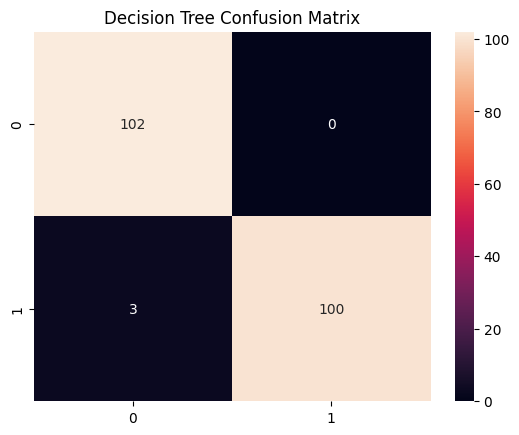

In [7]:
#📊 STEP 5: Evaluate Decision Tree
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.show()


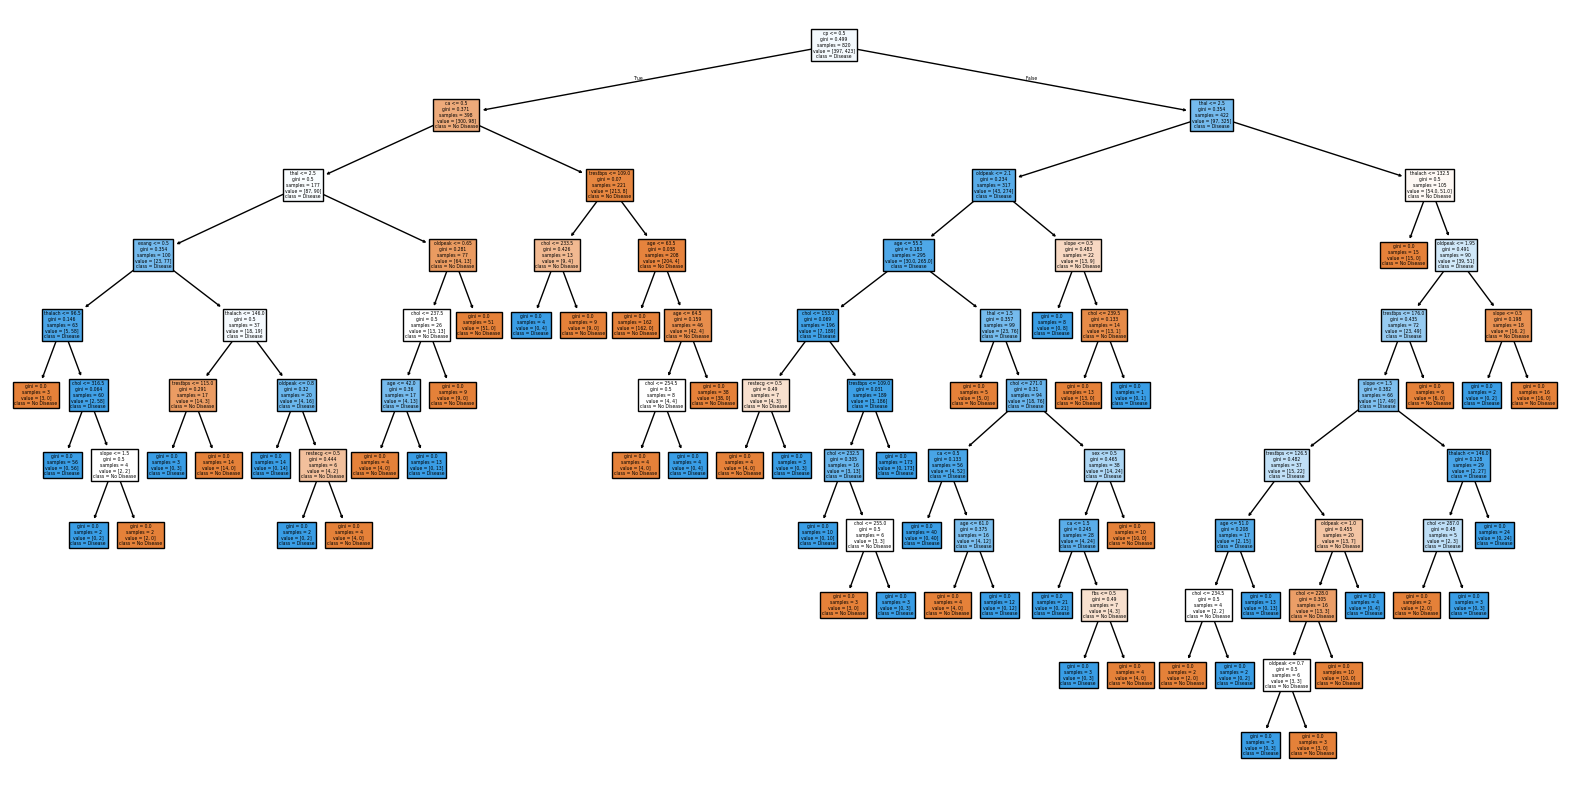

In [8]:
#🌳 STEP 6: Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()


In [9]:
#⚠️ STEP 7: Control Overfitting (Limit Tree Depth)
dtree2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree2.fit(X_train, y_train)
print("Accuracy (depth=4):", accuracy_score(y_test, dtree2.predict(X_test)))


Accuracy (depth=4): 0.8


In [10]:
#🌲 STEP 8: Train Random Forest Classifier
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

y_pred_rf = rforest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


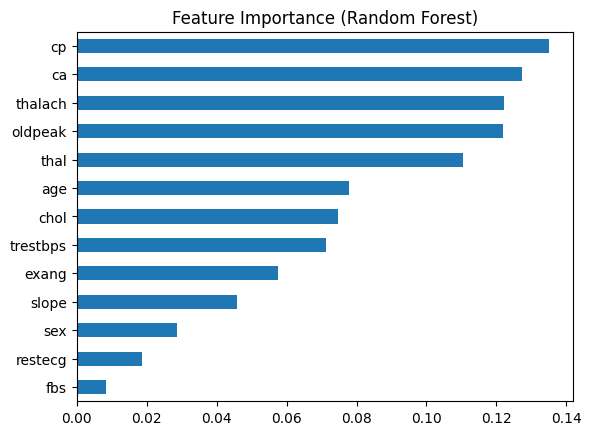

In [11]:
#🌟 STEP 9: Feature Importance
importances = rforest.feature_importances_
feat_importance = pd.Series(importances, index=X.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [12]:
#🔁 STEP 10: Cross-Validation
rf_scores = cross_val_score(rforest, X, y, cv=5)
print("Cross-Validation Accuracy (Random Forest):", rf_scores.mean())


Cross-Validation Accuracy (Random Forest): 0.9970731707317073
